In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

C:\Users\frase\AppData\Local\Temp\ipykernel_72192\486377480.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#data = pd.read_csv("D:/University-local/Imperial/Term 2/Machine Learning/ML/CW_1/breast_cancer_scaled.csv")
data = pd.read_csv("D:/University-local/Imperial/Term 2/Machine Learning/ML/CW_1/breast_cancer_scaled.csv")
#print(data.shape)
response = data["diagnosis"].to_numpy()
#convert to 1 for malignant and 0 for benign
response = np.array([1 if i == "M" else 0 for i in response ])[:,None]

#get features only
feature_data = data.drop("diagnosis",axis = 1)


In [5]:
#class imbalance?
print(data[response == 1].shape)
print(data[response == 0].shape)
print(212/569)

(212, 31)
(357, 31)
0.37258347978910367


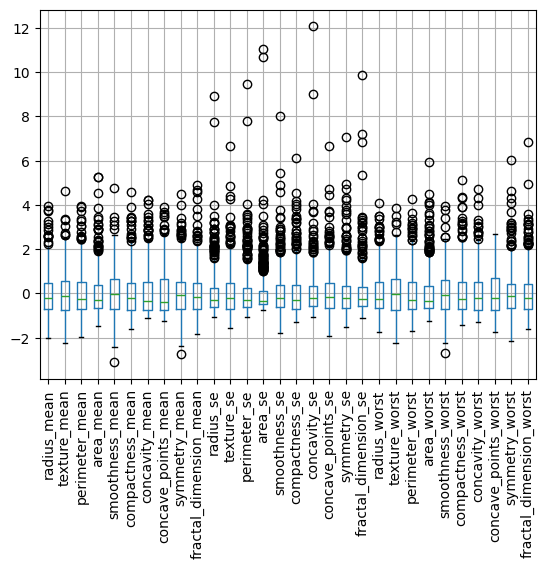

In [6]:
#produce boxplot for this:
data.boxplot(rot = 90)
plt.show()

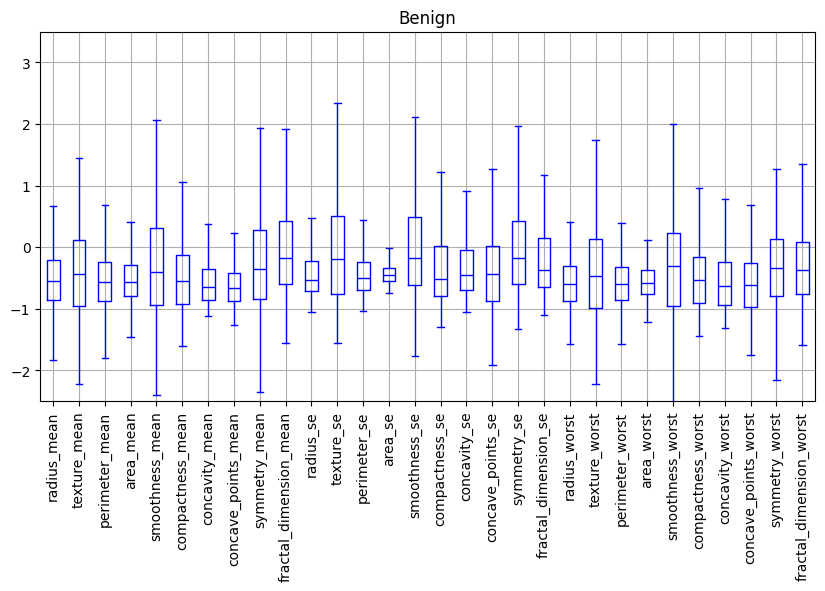

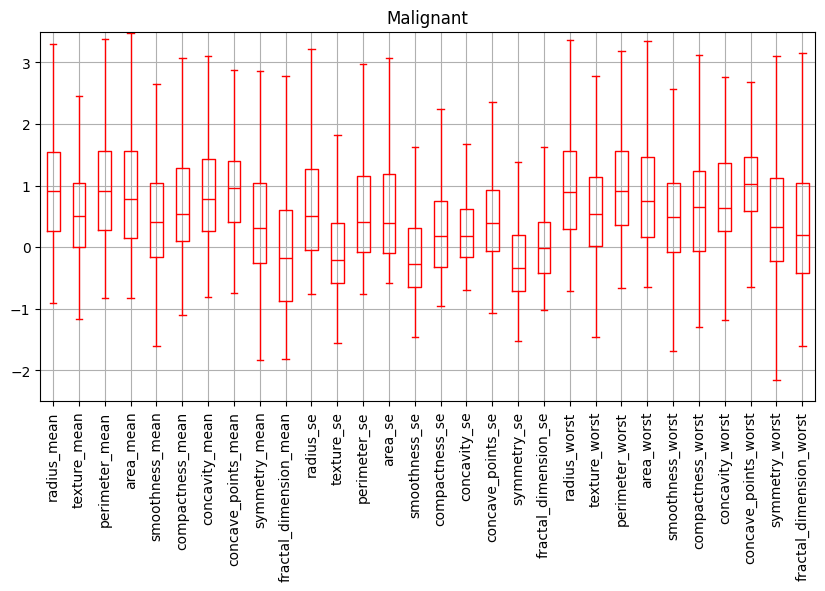

In [7]:
#by group:
feature_data_d = feature_data[response == 0]
feature_data_m = feature_data[response == 1]

plt.figure().set_figwidth(10)
axs= feature_data_d.boxplot(rot = 90,showfliers = False,color = "blue")
axs.set_title("Benign")
axs.set_ylim([-2.5,3.5])


plt.show()
plt.figure().set_figwidth(10)
ax = feature_data_m.boxplot(rot = 90,showfliers = False,color = "red")
ax.set_ylim([-2.5,3.5])
ax.set_title("Malignant")
plt.show()

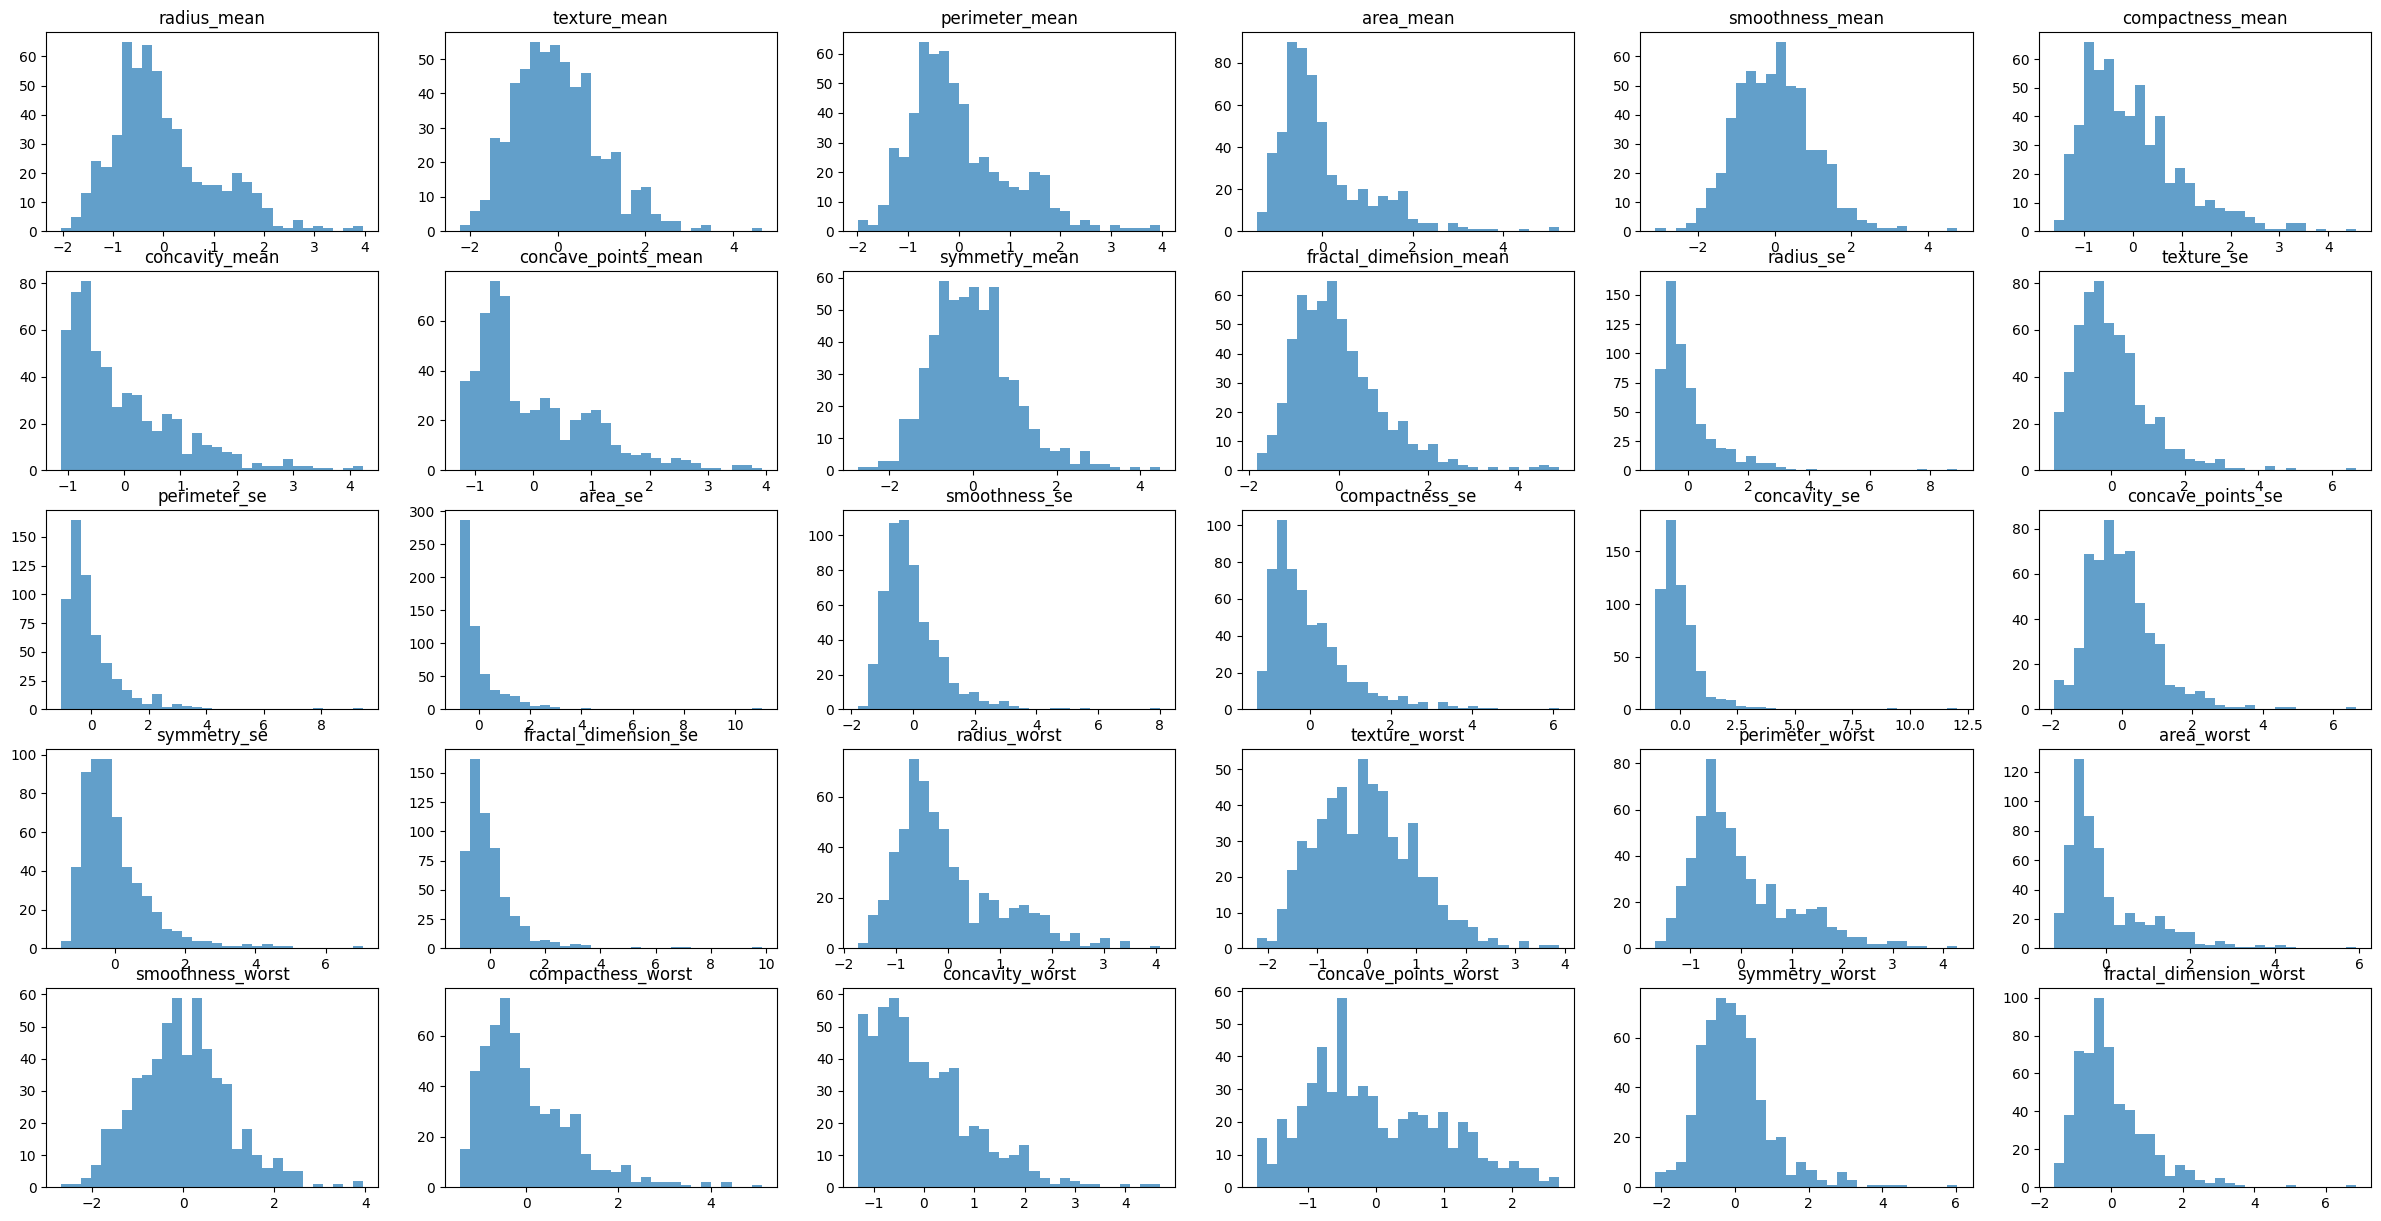

In [8]:

def plot_histograms(data):
    col_names = data.columns
    fig,axes = plt.subplots(nrows = 5, ncols =6)
    fig.set_figheight(15)
    fig.set_figwidth(30)

    for i in range(5):
        for j in range(6):
            axes[i,j].hist(data.iloc[:,6*i + j],bins = 30,alpha = 0.7)
            axes[i,j].set_title(col_names[6*i + j])
    plt.show()

plot_histograms(feature_data)

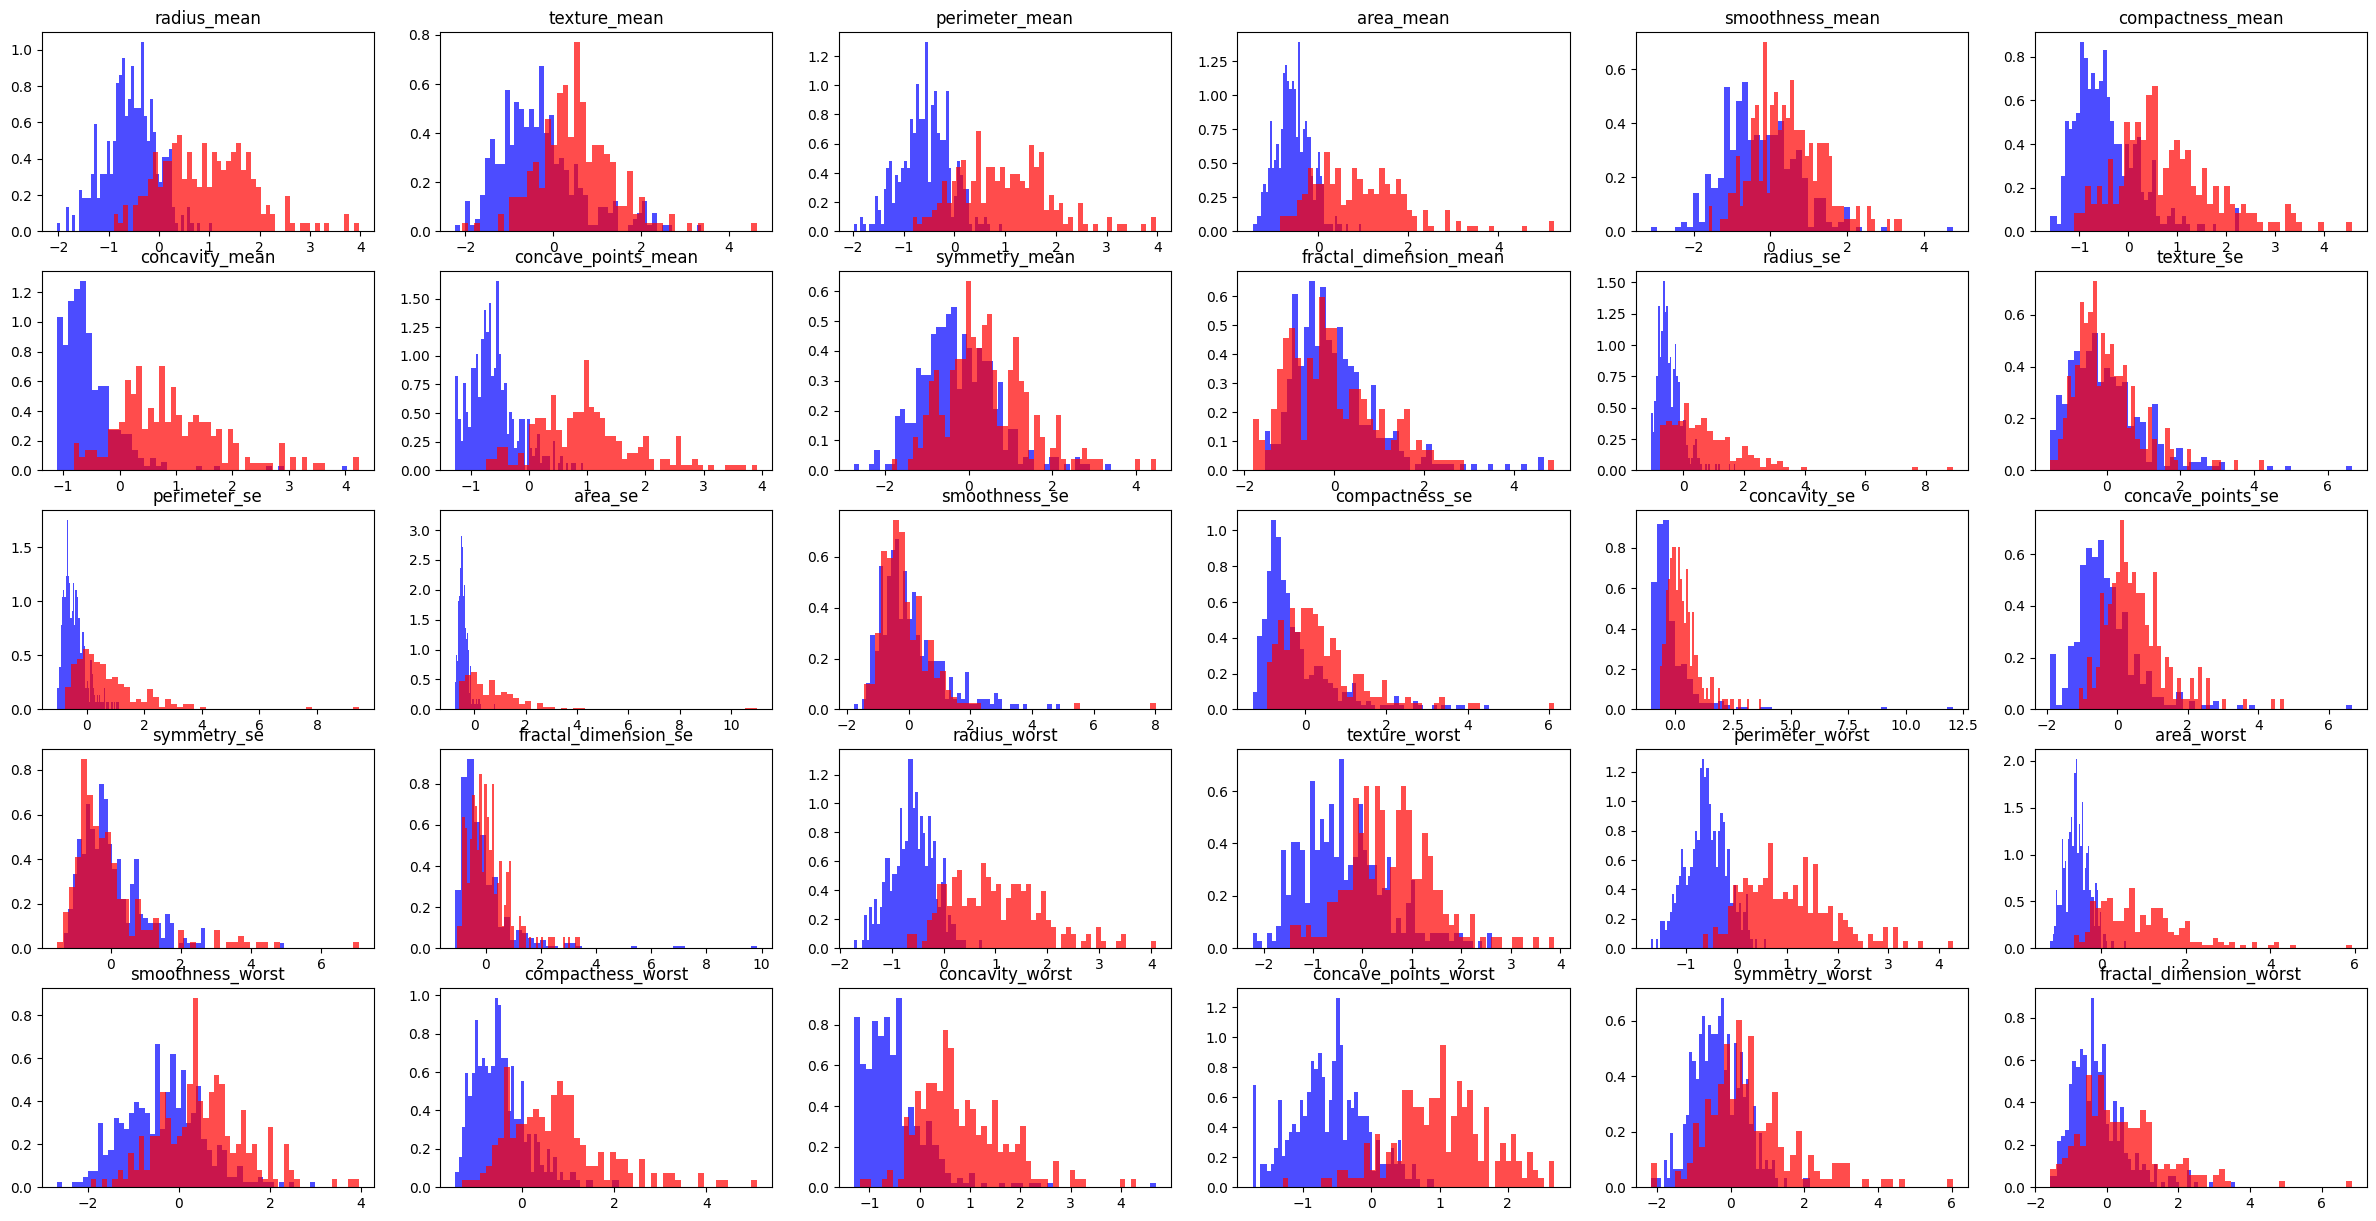

In [9]:

#partitioning by group
def plot_histograms_group(data,response):
    col_names = data.columns
    data_b = data[response == 0]
    data_m = data[response == 1]
    fig,axes = plt.subplots(nrows = 5, ncols =6)
    fig.set_figheight(15)
    fig.set_figwidth(30)

    for i in range(5):
        for j in range(6):
            axes[i,j].hist(data_b.iloc[:,6*i + j],bins = 50,alpha = 0.7,density= True,color = "blue")
            axes[i,j].hist(data_m.iloc[:,6*i + j],bins = 50,alpha = 0.7,density= True,color = "red")
            axes[i,j].set_title(col_names[6*i + j])
 
    plt.show()

plot_histograms_group(feature_data,response)

In [10]:

#split the data into a training set and a test set
y = response
X = feature_data.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [38]:
# Now actually begin the model comparison

# We begin with logistic regression

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

cancer_logit = logistic.fit(X_train,y_train.ravel())

cancer_logit_test = cancer_logit.predict(X_test)


print("Test error for logistic regression:", np.mean(cancer_logit_test != y_test.ravel()))
print("Accuracy for logistic regression:", np.mean(cancer_logit_test == y_test.ravel()))

#so we get a pretty decent error rate

Test error for logistic regression: 0.029239766081871343
Accuracy for logistic regression: 0.9707602339181286


In [12]:
#now do using LOO-CV

from sklearn.neighbors import KNeighborsClassifier

def knn_CV(X,y,k):
    CV = np.zeros([X.shape[0],1])
    for i in range(X.shape[0]):
        X_train = np.delete(X,i,axis = 0)
        X_test = X[i,:].reshape(1,-1)
        y_train = np.delete(y,i,axis = 0)
        y_test = y[i]
        #model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())
        knn_test = knn.predict(X_test)
        CV[i] = 1 if knn_test == y_test else 0
    print(k)
    return np.mean(CV)

#print(CV)
k_range = np.arange(1,100)


k_CV = [knn_CV(X_train,y_train,k) for k in k_range]



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


[0.9472361809045227, 0.9547738693467337, 0.9698492462311558, 0.964824120603015, 0.9698492462311558, 0.9673366834170855, 0.9673366834170855, 0.964824120603015, 0.964824120603015, 0.9623115577889447, 0.964824120603015, 0.9522613065326633, 0.957286432160804, 0.9522613065326633, 0.957286432160804, 0.9522613065326633, 0.9547738693467337, 0.949748743718593, 0.949748743718593, 0.9472361809045227, 0.9447236180904522, 0.9447236180904522, 0.9447236180904522, 0.9422110552763819, 0.9472361809045227, 0.9422110552763819, 0.9472361809045227, 0.9472361809045227, 0.9472361809045227, 0.9472361809045227, 0.9472361809045227, 0.9472361809045227, 0.9447236180904522, 0.9472361809045227, 0.949748743718593, 0.9472361809045227, 0.949748743718593, 0.9472361809045227, 0.9472361809045227, 0.9422110552763819, 0.9472361809045227, 0.9422110552763819, 0.9422110552763819, 0.9422110552763819, 0.9472361809045227, 0.9422110552763819, 0.9447236180904522, 0.9422110552763819, 0.9447236180904522, 0.9422110552763819, 0.9422110

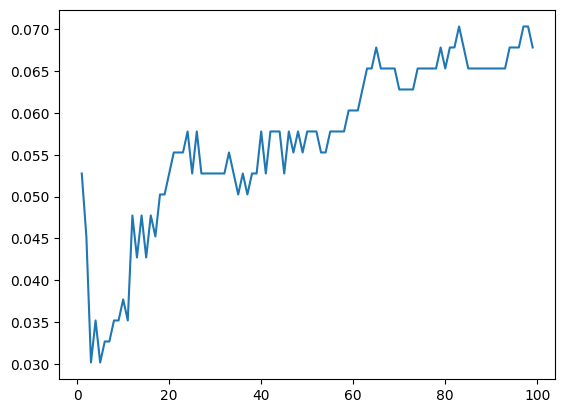

3


In [13]:
print(k_CV)
k_CV_err = np.ones_like(k_CV) - k_CV
plt.plot(k_range, k_CV_err)
plt.show()
min_k = k_range[np.argmin(k_CV_err)]
print(min_k)

In [17]:
### GAUSSIAN NAIVE BAYES ###

#since features could be gaussian, not an unreasonable assumtion

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(gnb_pred)
print(np.mean(gnb_pred == y_test.ravel()))

[1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0]
[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]
0.935672514619883


d:\University-local\Imperial\Term 2\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
